# TASK 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [140]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [141]:
# Import data

file_path = 'C:/Users/Mariana/Documents/Documents/Data Science/Prodigy/Task3/bank+marketing/bank/bank.csv'

# Read the CSV file with the correct delimiter
df = pd.read_csv(file_path, sep=';')

## EDA

In [142]:
# Check out the head of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [143]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [144]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [146]:
df.drop(columns=['day', 'month'], inplace=True)

In [147]:
#Dropping 'contact', as every participant has been contacted. 
df.drop('contact', axis=1, inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   duration   4521 non-null   int64 
 9   campaign   4521 non-null   int64 
 10  pdays      4521 non-null   int64 
 11  previous   4521 non-null   int64 
 12  poutcome   4521 non-null   object
 13  y          4521 non-null   object
dtypes: int64(6), object(8)
memory usage: 494.6+ KB


In [149]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [150]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']


In [151]:
# Looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

job has ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] values

marital has ['married' 'single' 'divorced'] values

education has ['primary' 'secondary' 'tertiary' 'unknown'] values

default has ['no' 'yes'] values

housing has ['no' 'yes'] values

loan has ['no' 'yes'] values

poutcome has ['unknown' 'failure' 'other' 'success'] values

y has ['no' 'yes'] values



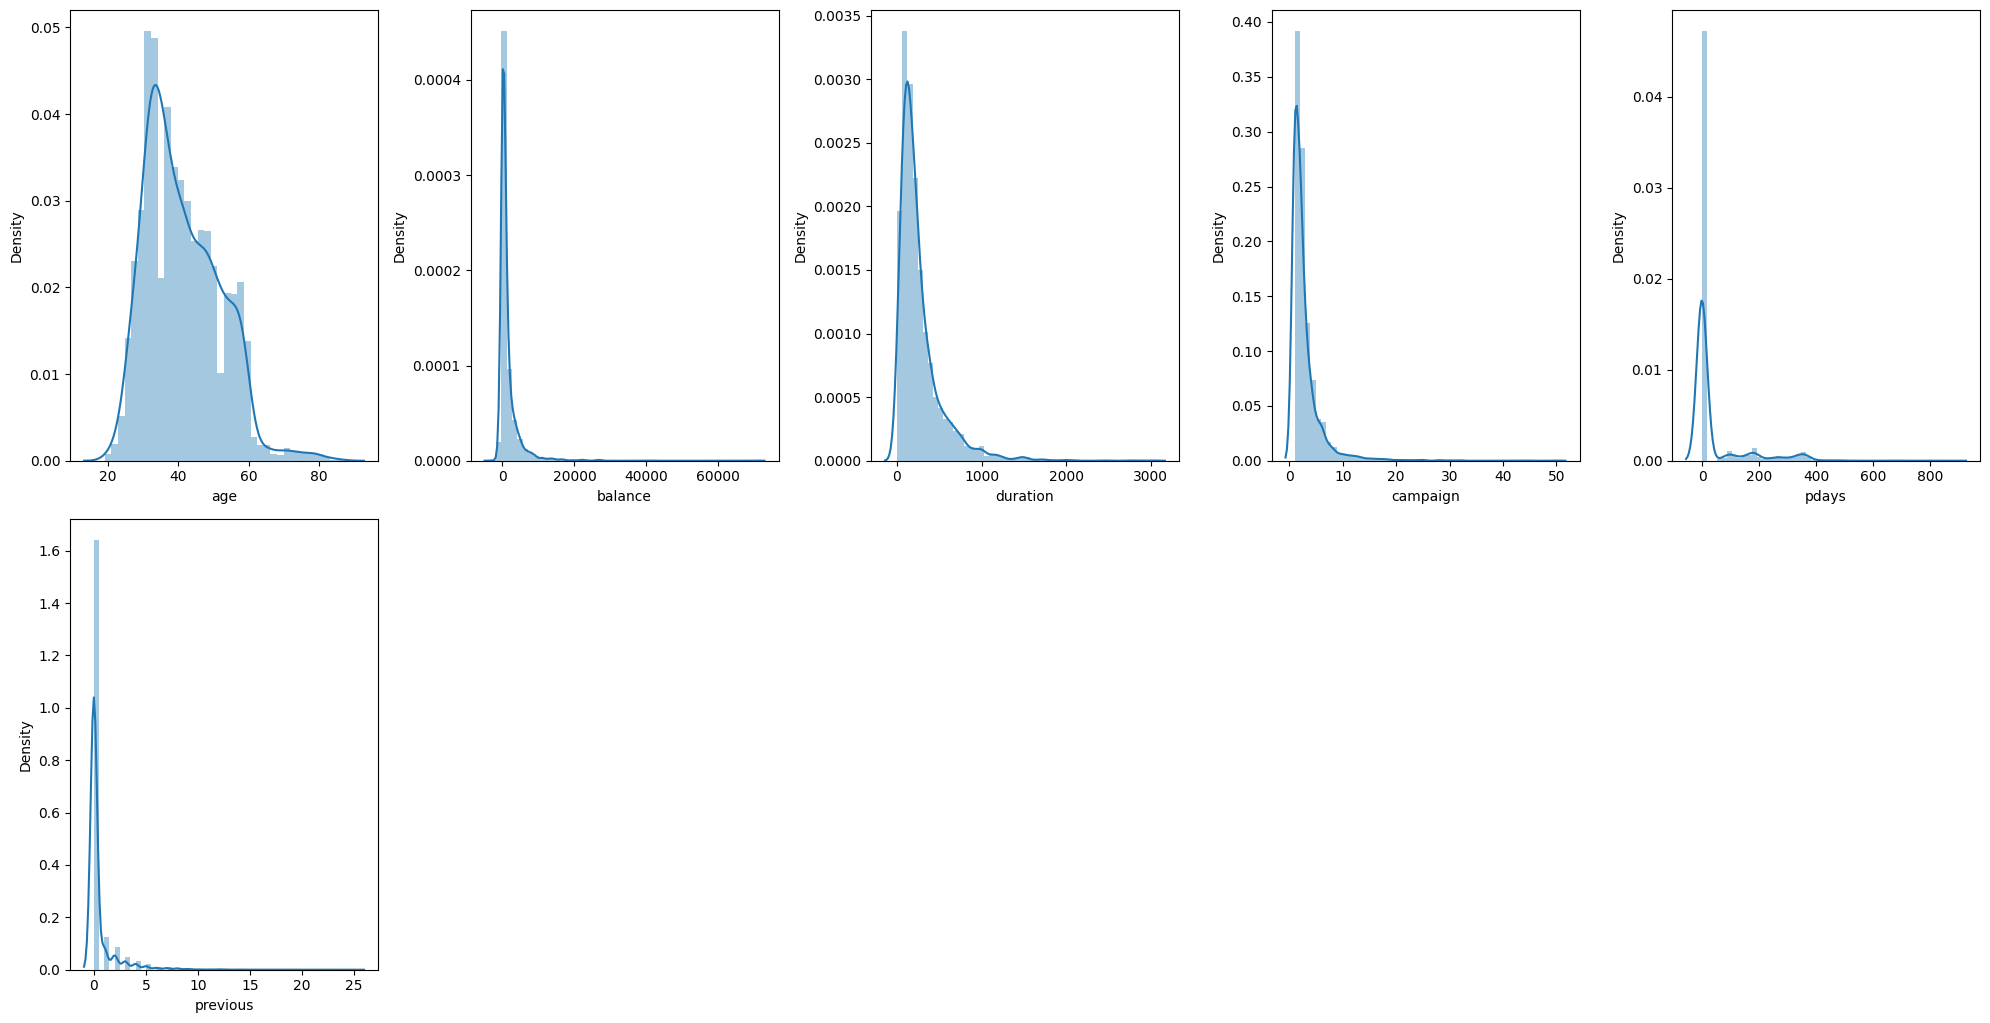

In [152]:
# Checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 6:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [153]:
#Combining columns 'unknown' and 'other' 
df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')
df.poutcome.value_counts()

poutcome
unknown    3902
failure     490
success     129
Name: count, dtype: int64

In [154]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

job has 12 categories

marital has 3 categories

education has 4 categories

default has 2 categories

housing has 2 categories

loan has 2 categories

poutcome has 3 categories

y has 2 categories



In [155]:
# Transforming categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [156]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,79,1,-1,0,2,0
1,33,7,1,1,0,4789,1,1,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,199,4,-1,0,2,0
4,59,1,1,1,0,0,1,0,226,1,-1,0,2,0


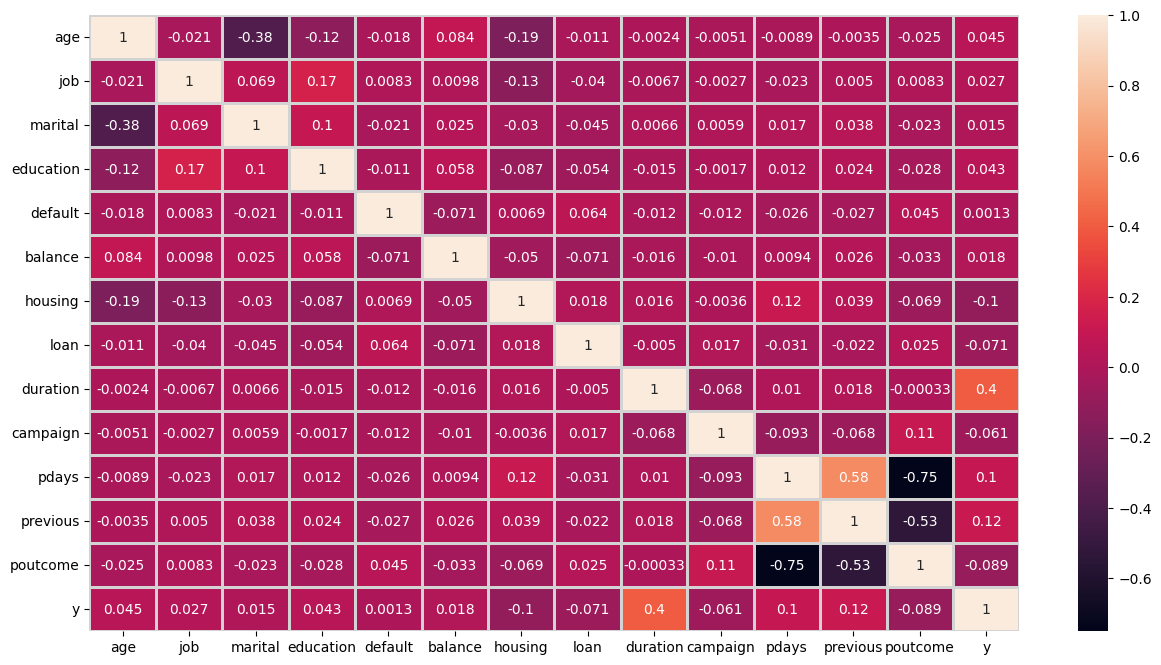

In [157]:
# heatmap of data
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


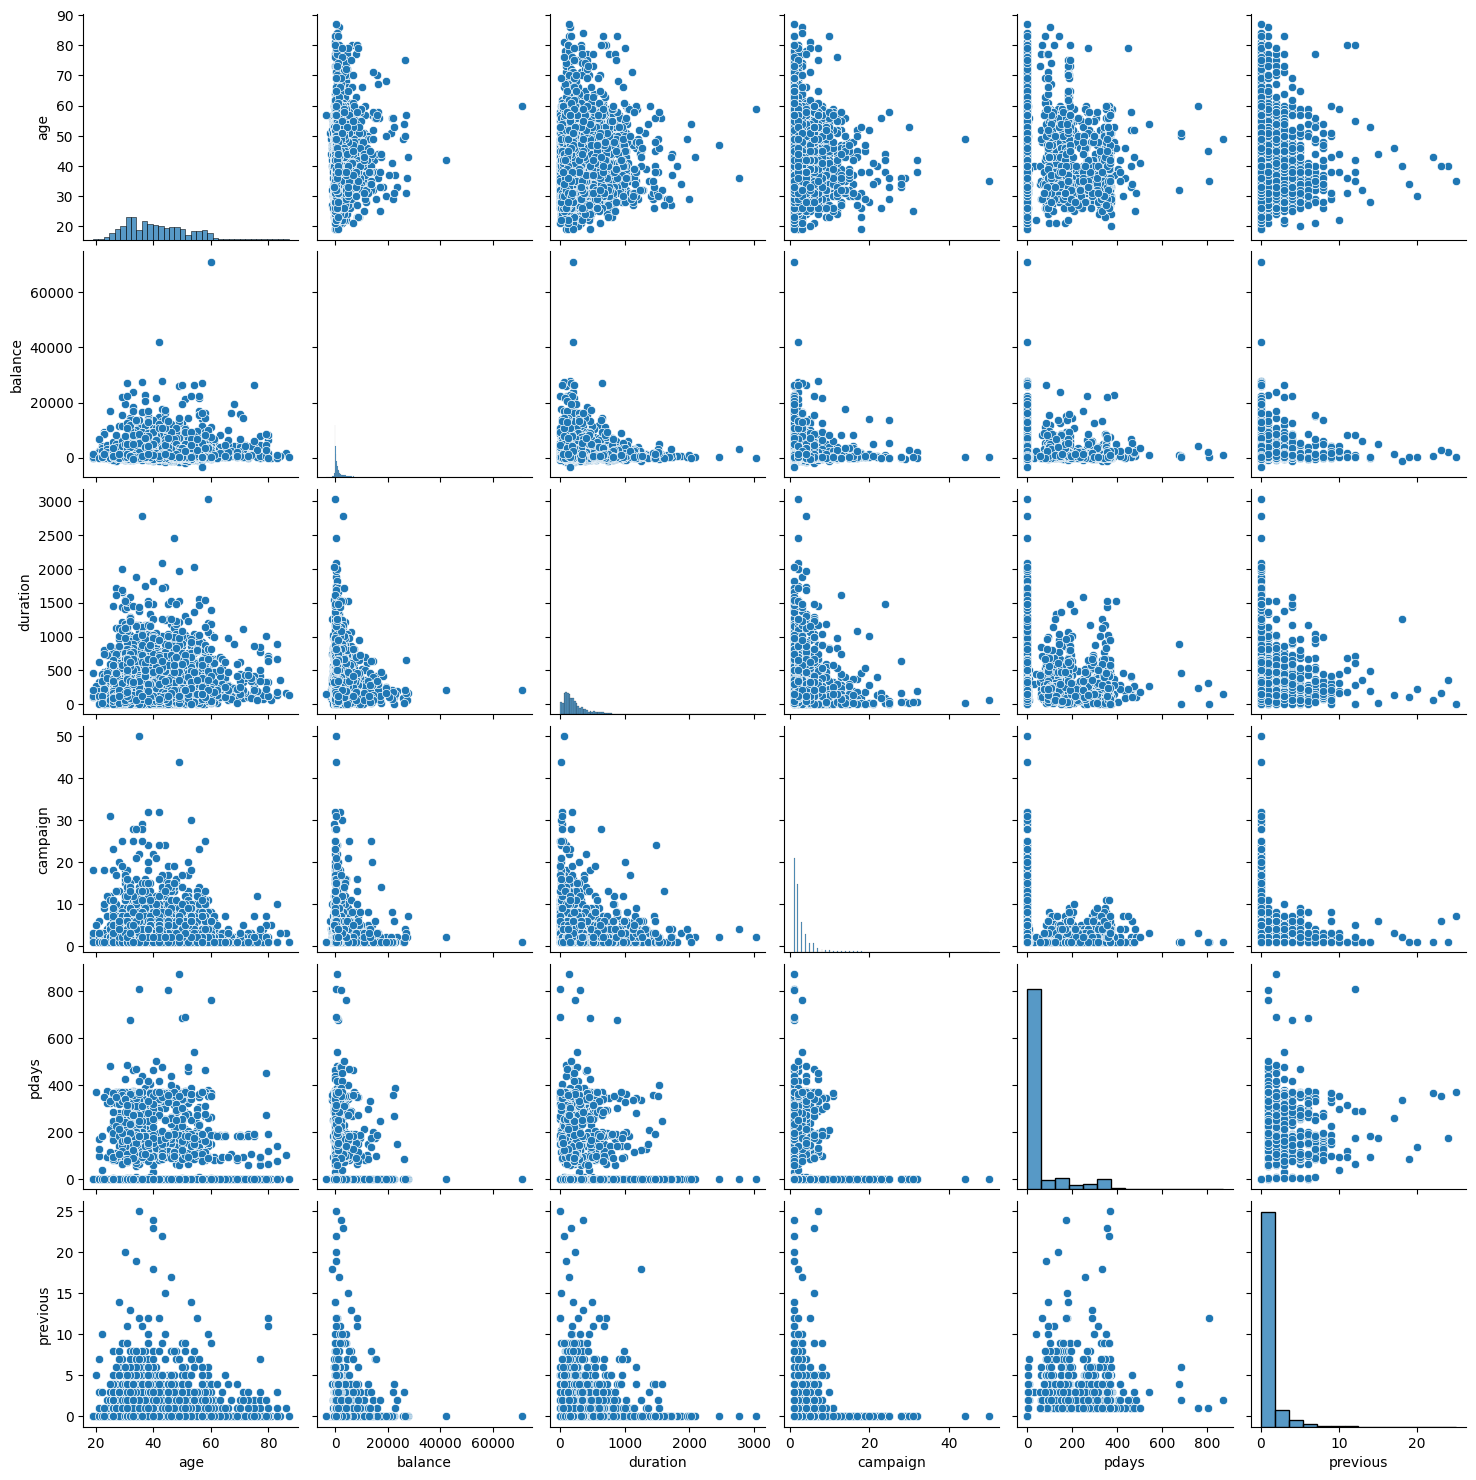

In [158]:
sns.pairplot(df[num_cols])

## Decision Tree Classifier

In [159]:
ind_col = [col for col in df.columns if col != 'y']
dep_col = 'y'

X = df[ind_col]
y = df[dep_col]

In [160]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"The training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"The test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

The training Accuracy of Decision Tree Classifier is 1.0
The test Accuracy of Decision Tree Classifier is 0.8570375829034635 

Confusion Matrix :- 
[[1098   92]
 [ 102   65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.41      0.39      0.40       167

    accuracy                           0.86      1357
   macro avg       0.66      0.66      0.66      1357
weighted avg       0.85      0.86      0.86      1357



In [162]:
# Searching for the best Hyper parameters

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None] 
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [163]:
# Best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'random'}
0.8966524686543884


In [164]:
# Best estimator

dtc = grid_search_dtc.best_estimator_

# Accuracy score, confusion matrix and classification report of decision tree

dtc_as = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_as} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9042351453855879
Test Accuracy of Decision Tree Classifier is 0.8828297715549005 

Confusion Matrix :- 
[[1162   28]
 [ 131   36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1190
           1       0.56      0.22      0.31       167

    accuracy                           0.88      1357
   macro avg       0.73      0.60      0.62      1357
weighted avg       0.86      0.88      0.86      1357

